In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#https://www.kaggle.com/berkeley-biosense/synchronized-brainwave-dataset
data  = np.array([-203.0, -202.0, -196.0, -185.0, -163.0, -137.0, -110.0, -70.0, -41.0, -28.0, -6.0, 35.0, 84.0, 105.0, 134.0, 171.0, 221.0, 233.0, 226.0, 242.0, 247.0, 221.0, 209.0, 217.0, 228.0, 205.0, 165.0, 155.0, 194.0, 224.0, 243.0, 258.0, 261.0, 261.0, 257.0, 266.0, 280.0, 250.0, 186.0, 131.0, 120.0, 123.0, 102.0, 60.0, 17.0, -19.0, -4.0, 6.0, -34.0, -70.0, -84.0, -89.0, -99.0, -106.0, -102.0, -109.0, -132.0, -151.0, -185.0, -211.0, -209.0, -194.0, -212.0, -231.0, -225.0, -205.0, -193.0, -163.0, -131.0, -108.0, -81.0, -56.0, -38.0, -24.0, -23.0, -22.0, -4.0, 8.0, 23.0, 54.0, 91.0, 121.0, 129.0, 131.0, 146.0, 168.0, 219.0, 275.0, 310.0, 308.0, 294.0, 296.0, 306.0, 296.0, 253.0, 208.0, 188.0, 185.0, 181.0, 170.0, 131.0, 116.0, 137.0, 129.0, 75.0, 66.0, 75.0, 77.0, 82.0, 104.0, 134.0, 121.0, 84.0, 49.0, 25.0, 0.0, -27.0, -52.0, -71.0, -94.0, -115.0, -131.0, -142.0, -162.0, -186.0, -209.0, -225.0, -204.0, -181.0, -165.0, -153.0, -145.0, -117.0, -91.0, -90.0, -86.0, -72.0, -73.0, -74.0, -60.0, -83.0, -125.0, -117.0, -60.0, -10.0, 17.0, 20.0, 9.0, 20.0, 50.0, 80.0, 91.0, 100.0, 120.0, 147.0, 151.0, 156.0, 176.0, 180.0, 165.0, 179.0, 208.0, 200.0, 151.0, 121.0, 135.0, 145.0, 124.0, 92.0, 64.0, 53.0, 71.0, 96.0, 99.0, 82.0, 36.0, -7.0, -36.0, -60.0, -67.0, -67.0, -81.0, -92.0, -83.0, -65.0, -74.0, -109.0, -146.0, -180.0, -200.0, -189.0, -155.0, -138.0, -131.0, -145.0, -163.0, -161.0, -145.0, -134.0, -122.0, -102.0, -73.0, -74.0, -72.0, -72.0, -97.0, -117.0, -109.0, -76.0, -27.0, 8.0, 8.0, 25.0, 60.0, 87.0, 90.0, 68.0, 58.0, 100.0, 149.0, 170.0, 170.0, 170.0, 166.0, 170.0, 192.0, 196.0, 192.0, 203.0, 218.0, 229.0, 227.0, 244.0, 265.0, 261.0, 253.0, 251.0, 262.0, 282.0, 283.0, 268.0, 256.0, 249.0, 224.0, 171.0, 130.0, 123.0, 131.0, 129.0, 113.0, 99.0, 85.0, 55.0, 44.0, 61.0, 68.0, 52.0, 29.0, 35.0, 48.0, 73.0, 98.0, 96.0, 73.0, 58.0, 22.0, -28.0, -55.0, -57.0, -66.0, -97.0, -134.0, -135.0, -137.0, -124.0, -83.0, -21.0, 40.0, 88.0, 124.0, 162.0, 194.0, 200.0, 189.0, 151.0, 119.0, 99.0, 66.0, 55.0, 74.0, 72.0, 37.0, -6.0, -33.0, -13.0, -8.0, -46.0, -76.0, -54.0, -25.0, -34.0, -41.0, -33.0, -40.0, -67.0, -67.0, -57.0, -52.0, -37.0, -6.0, 23.0, 19.0, 11.0, 39.0, 73.0, 83.0, 91.0, 101.0, 115.0, 124.0, 115.0, 86.0, 49.0, 1.0, -44.0, -69.0, -81.0, -59.0, -18.0, -13.0, -37.0, -53.0, -45.0, -19.0, 26.0, 52.0, 56.0, 69.0, 113.0, 149.0, 163.0, 170.0, 162.0, 129.0, 92.0, 76.0, 68.0, 49.0, 28.0, 6.0, -29.0, -39.0, -24.0, -41.0, -76.0, -99.0, -102.0, -89.0, -59.0, -27.0, -29.0, -45.0, -39.0, -13.0, 1.0, -12.0, -34.0, -28.0, -24.0, -49.0, -78.0, -103.0, -114.0, -131.0, -122.0, -82.0, -56.0, -49.0, -23.0, 11.0, 52.0, 64.0, 48.0, 48.0, 61.0, 65.0, 60.0, 80.0, 106.0, 121.0, 105.0, 87.0, 99.0, 113.0, 122.0, 131.0, 134.0, 152.0, 176.0, 195.0, 215.0, 235.0, 241.0, 217.0, 211.0, 221.0, 218.0, 181.0, 160.0, 156.0, 140.0, 122.0, 93.0, 65.0, 66.0, 43.0, 16.0, -4.0, -20.0, -37.0, -57.0, -70.0, -81.0, -83.0, -86.0, -87.0, -90.0, -103.0, -121.0, -139.0, -149.0, -136.0, -120.0, -125.0, -139.0, -151.0, -158.0, -169.0, -167.0, -120.0, -72.0, -52.0, -38.0, -9.0, 23.0, 59.0, 71.0, 59.0, 58.0, 58.0, 41.0, 25.0, 16.0, 7.0, -2.0, 32.0, 81.0, 107.0, 109.0, 103.0, 108.0, 133.0, 150.0, 148.0, 136.0, 128.0, 107.0, 102.0, 116.0, 113.0, 81.0, 9.0, -39.0, -43.0, -34.0, -58.0, -90.0, -103.0, -105.0, -115.0, -117.0, -107.0, -86.0, -75.0, -86.0, -103.0, -124.0, -130.0, -106.0, -104.0, -104.0, -91.0, -99.0, -117.0, -110.0, -76.0, -55.0, -77.0, -113.0, -120.0, -104.0, -97.0, -61.0, -17.0, -13.0, -51.0, -77.0, -62.0, -22.0, 20.0, 44.0, 67.0])

In [3]:
data = (data-np.mean(data))/np.std(data)

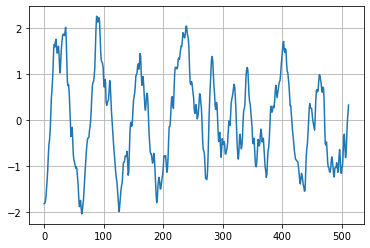

In [4]:
plt.plot(data)
plt.grid()
plt.show()

In [5]:
f = 5 #Hz
sigma = 0.5
Ts = 0.01
t=np.arange(-2,2,Ts)

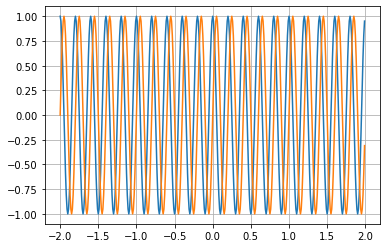

In [6]:
y_sin = np.exp(1j*2*np.pi*f*t)
plt.plot(t,np.real(y_sin))
plt.plot(t,np.imag(y_sin))
plt.grid()
plt.show()

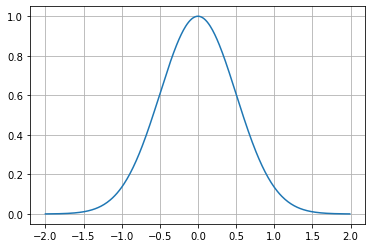

In [7]:
gaus = np.exp(-0.5*np.square(t/sigma))
plt.plot(t,gaus)
plt.grid()
plt.show()

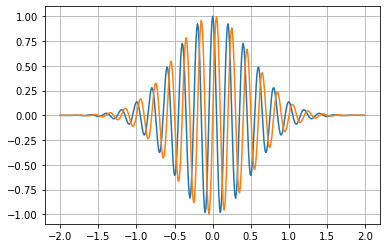

In [8]:
cmw = np.exp((1j*2*np.pi*f*t)-0.5*np.square(t/sigma))
plt.plot(t,np.real(cmw))
plt.plot(t,np.imag(cmw))
plt.grid()
plt.show()

In [9]:
# sum of wavelet is closed to zero
np.sum(cmw)

(-0.0005206534858883116-3.552713678800501e-15j)

In [10]:
f_data = np.fft.rfft(np.real(cmw))
xf = np.linspace(0.0, 1.0/(2.0*Ts), f_data.size)

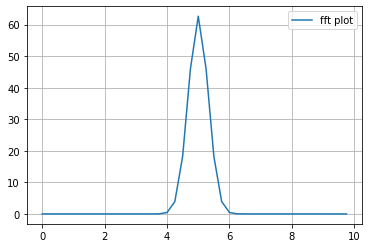

In [11]:
n = 40
plt.plot(xf[:n],np.abs(f_data[:n]))
plt.legend(['fft plot'])
plt.grid()
plt.show()

In [12]:
yconv = np.convolve(data,cmw,'same')

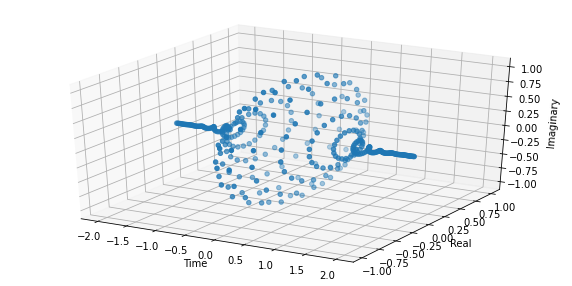

In [13]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t,np.real(cmw),np.imag(cmw))
ax.set_xlabel('Time')
ax.set_ylabel('Real')
ax.set_zlabel('Imaginary')
plt.show()

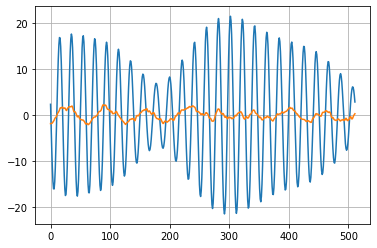

In [14]:
plt.plot(np.real(yconv))
plt.plot(data)
plt.grid()
plt.show()

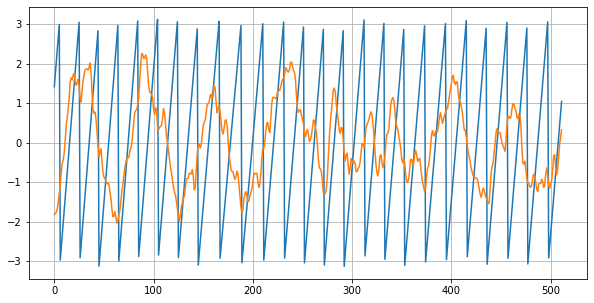

In [15]:
plt.figure(figsize=(10,5))
plt.plot(np.angle(yconv))
plt.plot(data)
plt.grid()
plt.show()

In [16]:
#extracting information from wavelet coefficients
freq = np.arange(1,11)
cmwPT = []
for f in freq:
    cmw = np.exp((1j*2*np.pi*f*t)-0.5*np.square(t/sigma))
    cmwPT.append(cmw)

In [17]:
dataSet = []
for ii in cmwPT:
    temp = np.convolve(data,ii,'same')
    dataSet.append(temp)

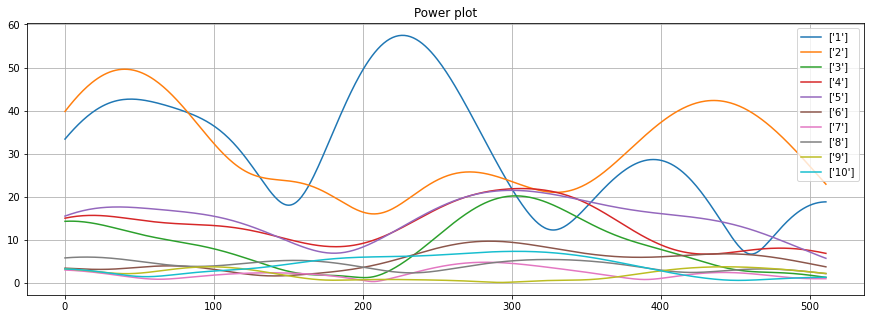

In [18]:
legend =[]
plt.figure(figsize=(15,5))
for jj,ii in enumerate(dataSet):
    plt.plot(np.abs(ii))
    legend.append([str(jj+1)])
plt.grid()
plt.title('Power plot')
plt.legend(legend)
plt.show()

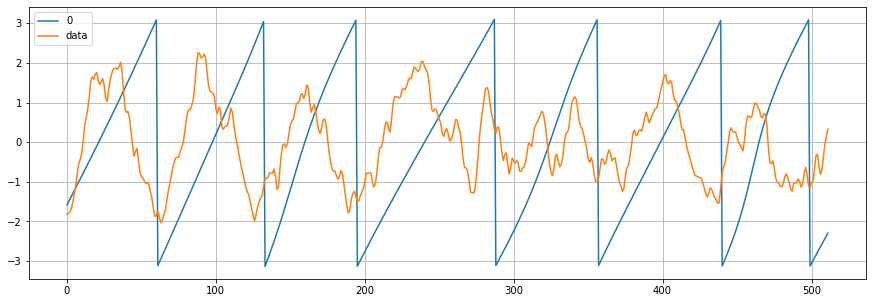

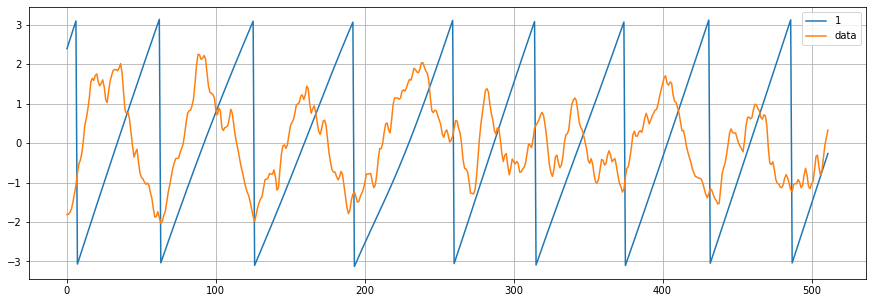

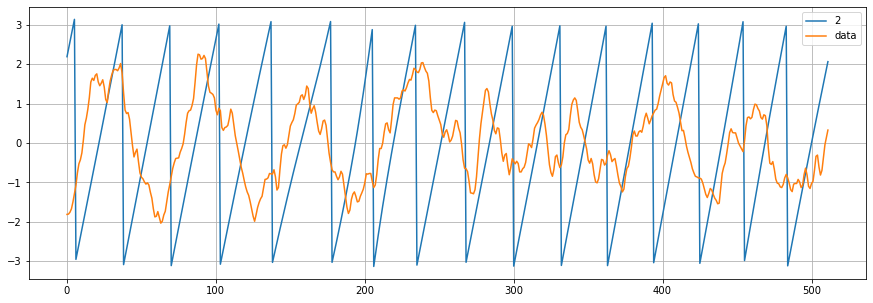

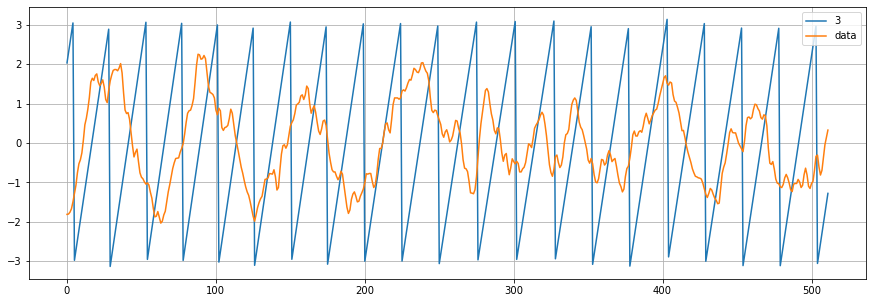

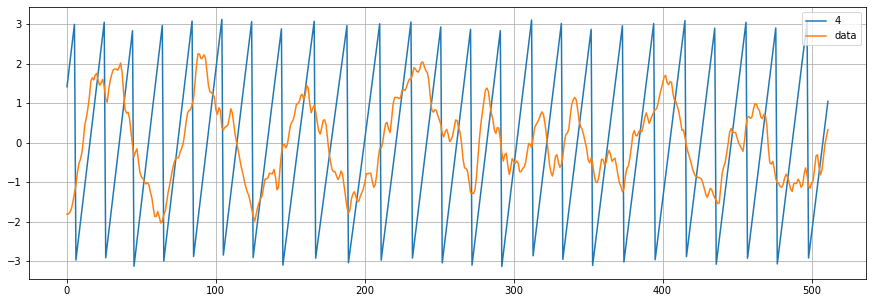

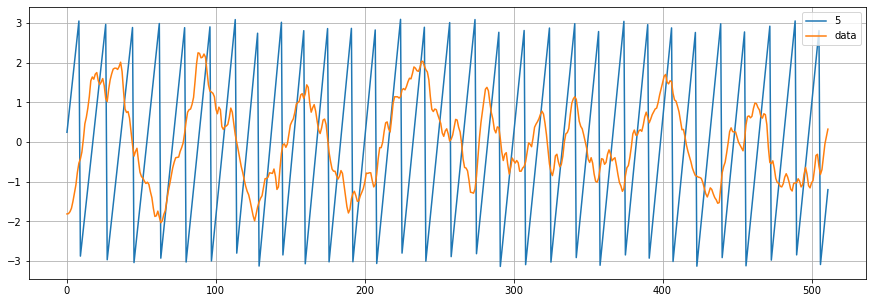

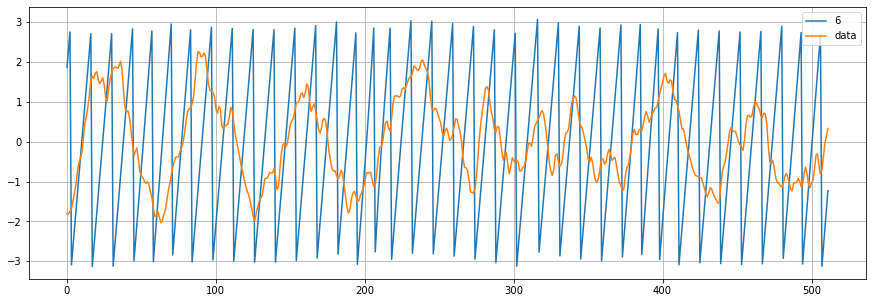

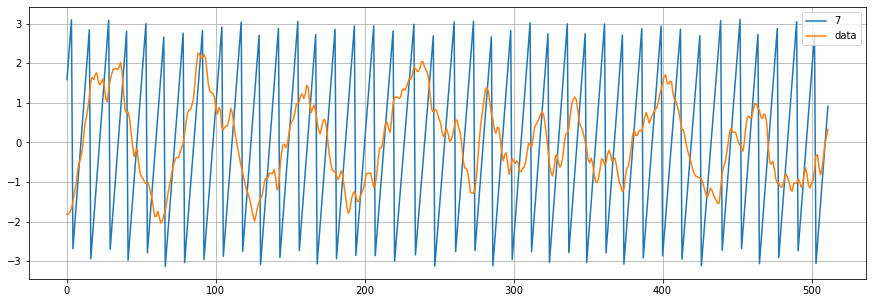

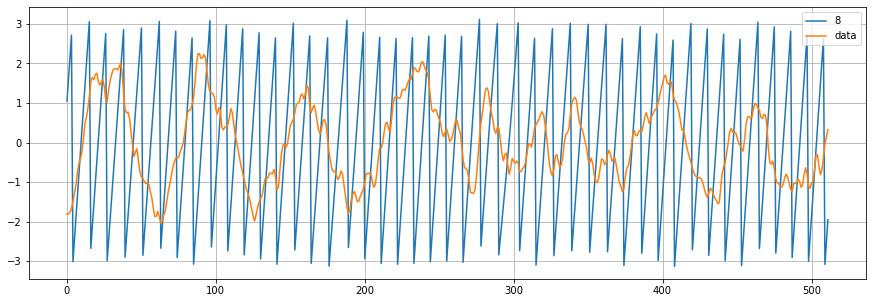

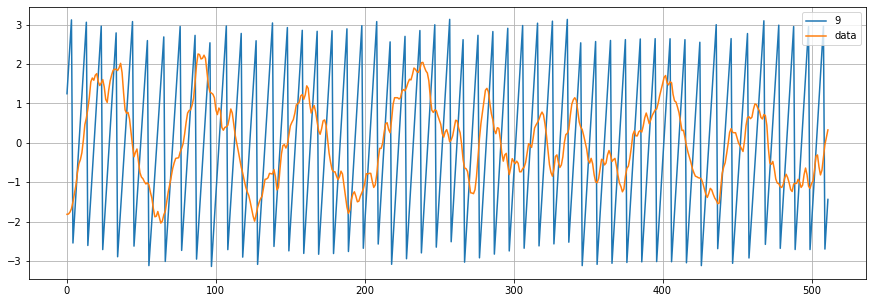

In [19]:
# angle plot
for jj,ii in enumerate(dataSet):
    plt.figure(figsize=(15,5))
    plt.plot(np.angle(ii))
    plt.plot(data)
    plt.grid()
    plt.legend([str(jj),'data'])
    plt.show()

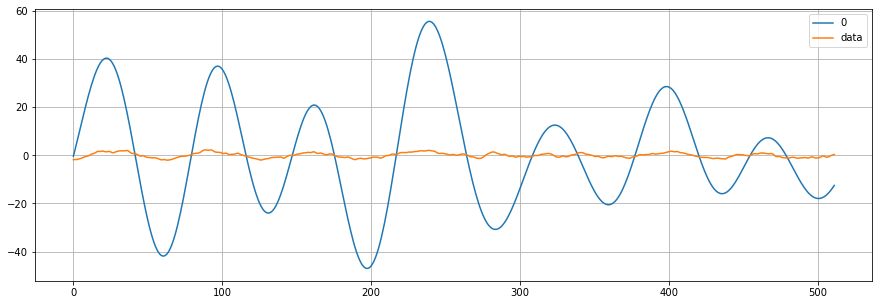

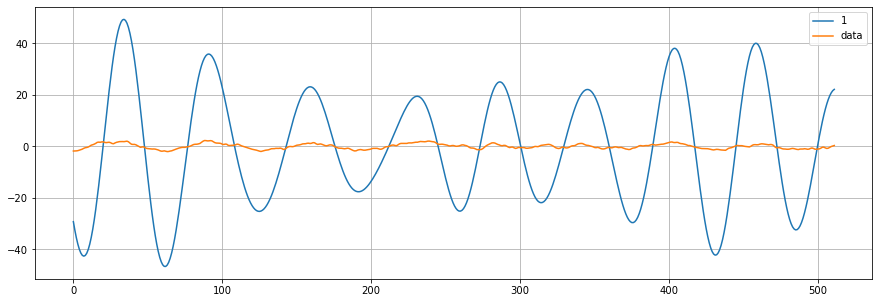

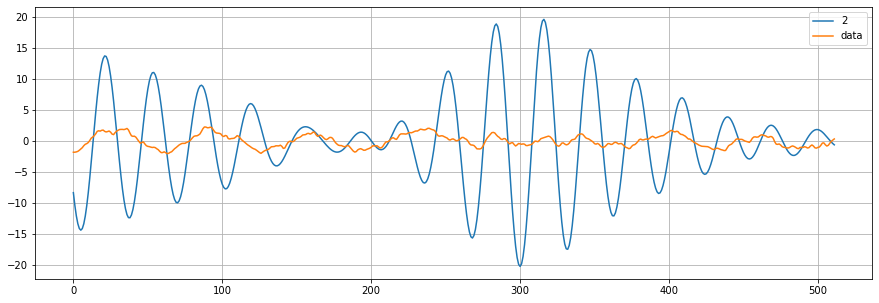

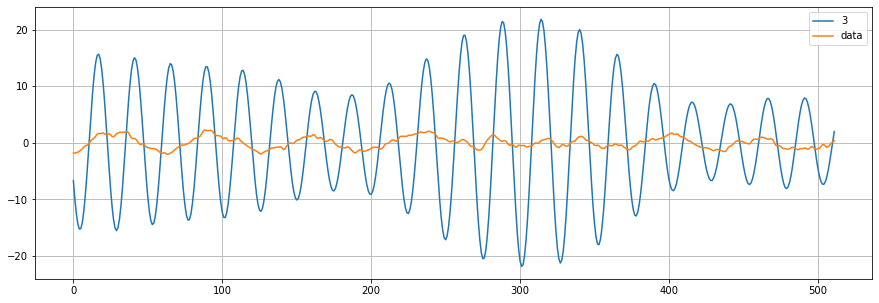

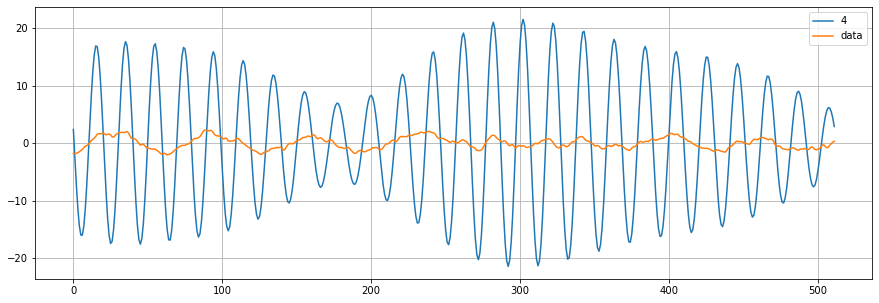

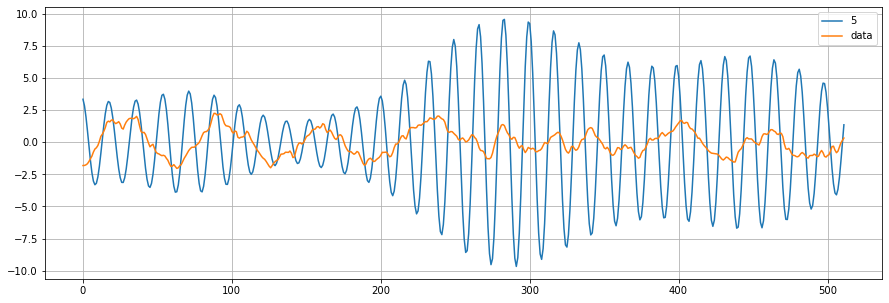

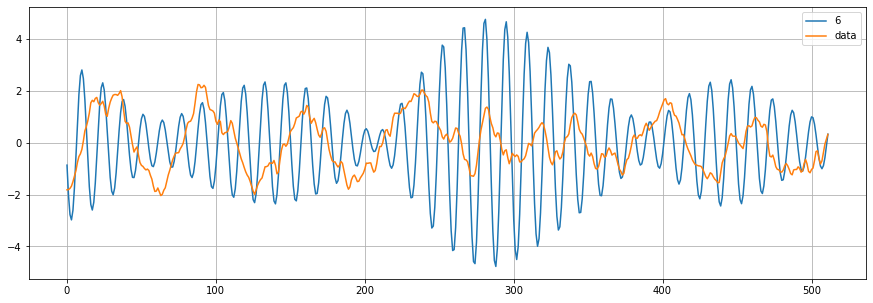

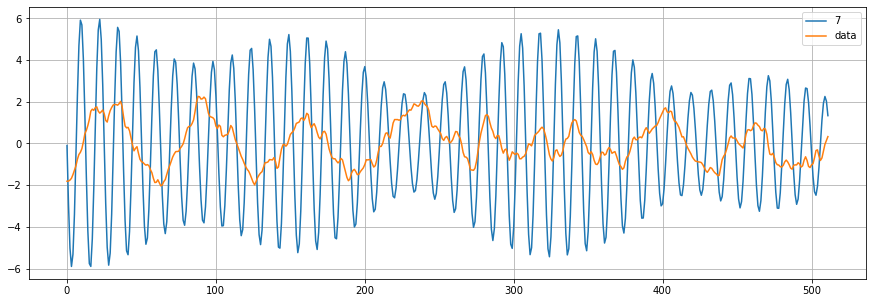

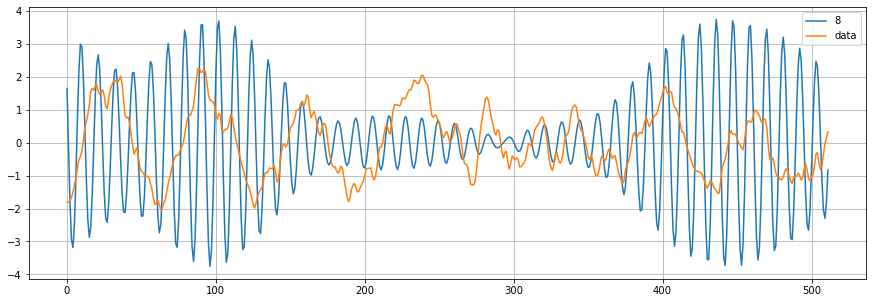

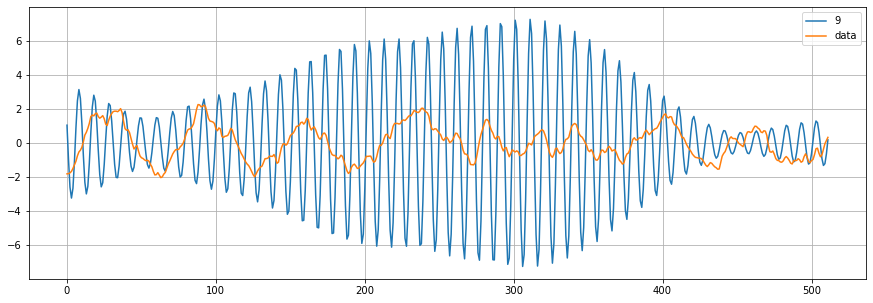

In [20]:
# narrow band filter signal
for jj,ii in enumerate(dataSet):
    plt.figure(figsize=(15,5))
    plt.plot(np.real(ii))
    plt.plot(data)
    plt.grid()
    plt.legend([str(jj),'data'])
    plt.show()